In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import re
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from wordcloud import WordCloud

In [3]:
# Load the dataset
resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv', encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [4]:
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [5]:
print ("Displaying the distinct categories of resume:\n\n ")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [6]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


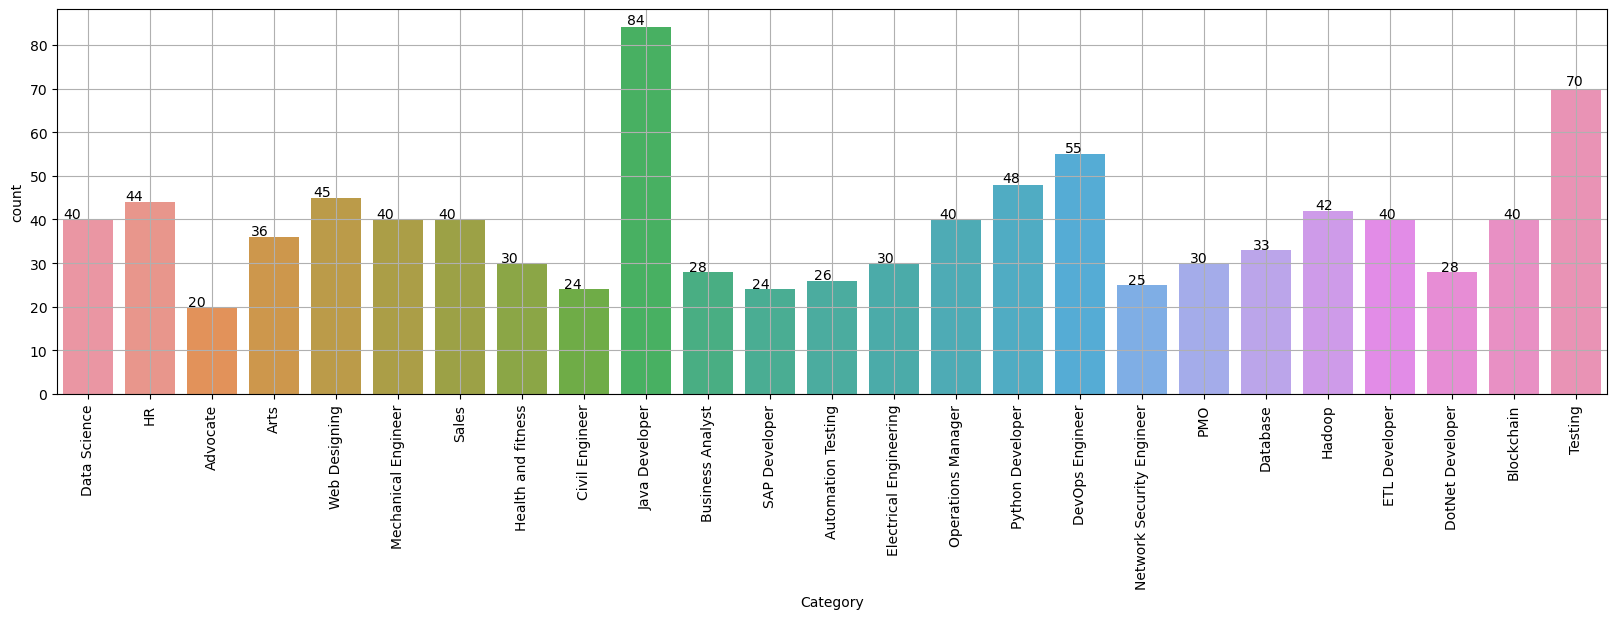

In [7]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resumeDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

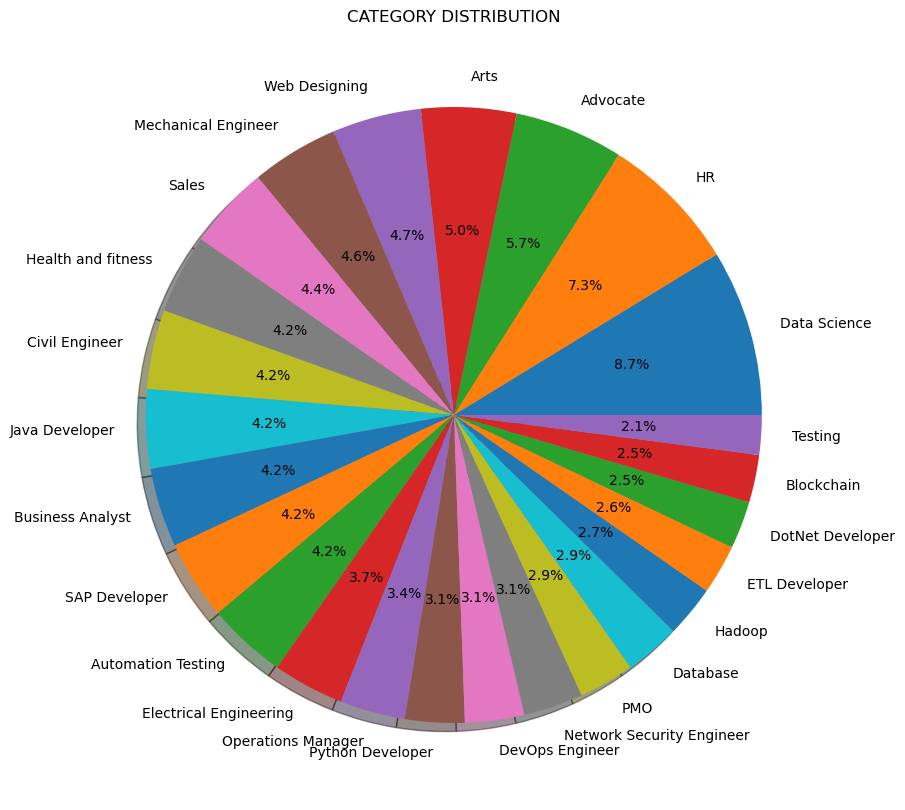

In [8]:
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [9]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

In [11]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [12]:
resumeDataSet_d=resumeDataSet.copy()

In [13]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


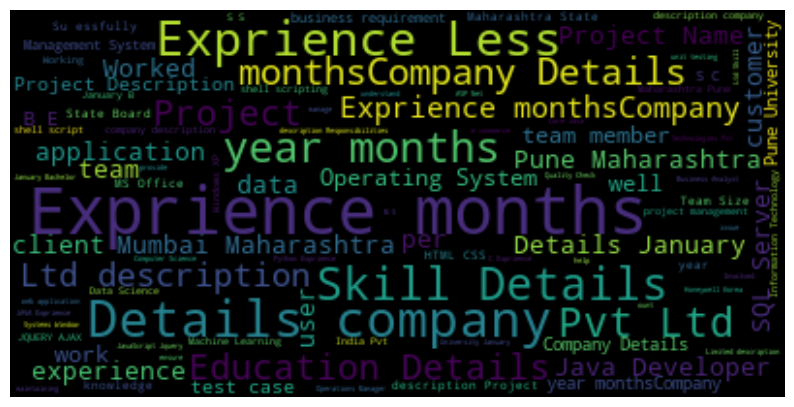

In [14]:
# Define the Word Cloud
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
# Encode the target labels
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [16]:
# Split the data into train and test sets
requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=42, test_size=0.2,
                                                    shuffle=True, stratify=requiredTarget)

In [17]:
# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=WordFeatures.shape[1], output_dim=128, input_length=WordFeatures.shape[1]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(set(requiredTarget)), activation='softmax')
])

NameError: name 'tf' is not defined

In [18]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

NameError: name 'model' is not defined

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from wordcloud import WordCloud

# Load your dataset (replace 'dataset.csv' with your dataset path)
data = pd.read_csv('UpdatedResumeDataSet.csv', encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''

# Replace 'text_column' with the actual column name containing text data (e.g., 'ResumeText')
X_train, X_test, y_train, y_test = train_test_split(data['ResumeText'], data['encoded_labels'], test_size=0.2, random_state=42)

# Data preprocessing (cleaning and label encoding)
def clean_text(text):
    # Implement your text cleaning/preprocessing steps here
    return cleaned_text

data['cleaned_text'] = data['text_column'].apply(clean_text)

# Encode labels
label_encoder = LabelEncoder()
data['encoded_labels'] = label_encoder.fit_transform(data['label_column'])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['encoded_labels'], test_size=0.2, random_state=42)

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Embedding(input_dim=X_train_tfidf.shape[1], output_dim=128, input_length=X_train_tfidf.shape[1]))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_tfidf, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_tfidf, y_test)
print(f'Test accuracy: {test_accuracy}')

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
class_names = label_encoder.classes_
print(classification_report(y_test, y_pred_classes, target_names=class_names))

# Optional: Visualize training history (loss and accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


NameError: name 'resumeDataSet' is not defined

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Sample dataset (you should replace this with your own dataset)
# data = pd.DataFrame({
#     'resume_text': ['Experienced software engineer...', 'Strong project management skills...', ...],
#     'label': ['Qualified', 'Not Qualified', ...]
# })

data = pd.DataFrame({
    'resume_text': [
        'Experienced software engineer...',
        'Strong project management skills...',
        # Add more resume texts here as needed
    ],
    'label': ['Qualified', 'Not Qualified', ...]
})

# Preprocess the data
X = data['resume_text']
y = data['label']

# Tokenize and pad the text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_sequence = tokenizer.texts_to_sequences(X)
max_sequence_length = 100  # Define your desired sequence length

X_pad = pad_sequences(X_sequence, maxlen=max_sequence_length)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

# Build a simple feedforward neural network
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=X_pad.shape[1]))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Make predictions on new data
new_resume = ["A highly motivated candidate with relevant experience..."]
new_resume_sequence = tokenizer.texts_to_sequences(new_resume)
new_resume_pad = pad_sequences(new_resume_sequence, maxlen=X_pad.shape[1])
predicted_label = model.predict(new_resume_pad)
predicted_class = label_encoder.inverse_transform([1 if score >= 0.5 else 0 for score in predicted_label])
print(f"Predicted Label: {predicted_class[0]}")


ValueError: All arrays must be of the same length